1.1. We created Lat_long_combined as a combined column, but didn't do anything with it. Investigate whether this combined feature is better for prediction than the two independent features and whether adding it to the current features provides better performance. Can you find any other ways of combining latitude and longitude into a single feature?

1.2. Plot the scatterplots for the other features than Distance and write a few sentences about your observations and interpretation of the results regarding the informativeness of the individual features for predicting the price and how well a straight line can fit the data for each feature.

1.3. Describe your conclusions about the correlations between the columns (features) in the data (see df.corr()) in a few sentences. Obviously the correlations between the output (Price) and the other features are the most important. Which features seem most informative? But also look at pairwise correlations between all features and try to make sense of them.

1.4. Check the difference between Pearson, Kendall and Spearman correlation. Which one would be the best to choose for this data and why? https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

1.5. Compare our plot of the coefficients of the trained model at the end of the notebook (this is the importance assigned by the model to each of the input features) with the correlations we computed during data inspection. Are they similar? Where do they differ? Do you have an explanation?

# 1.1

Latitude and Longitude correlate with each other and with Stores and Distance, but what does that mean? Lat and Long should not correlate because they are independent. However, this is not a random selection of worldwide houses, all the houses are in teh same city so it makes sense the two position values correlate. It also makes sense the same longitude and latitude will correlate with more or less stores and distance to the metro.

We should somehow translate these two features into one. One option would be to translate a lat-long combination to a neighborhood (or street), and use those as feature.

```df['Lat_long_combined'] = df['Lat'].astype('str') + '_' + df['Long'].astype('str')```

But: could not convert string to float (we can't use this feature because it is not numeric).

```df['Lat_long_combined'] = df['Long'] + df['Lat'] * 1j```

But: complex numbers not supported (or reduced to real)

We are stuck here. We can do clustering, we can do geohashing, but in the end we will have to find some way to make these non-numeric features numeric for linear regression.

In any case location is important. The following figure divides prices up in 3 classes of 1/3 of the data (expensive, red; midrange, yellow; cheaper, green). Mapping this using longitude and latitude on a geographical map shows there are indeed expensive and cheap neighborhoods. We could use a number assigned to each color of each house (or a more fine-grained system of values) as a unique feature for better results.

<img src="../figures/geo-pricediffs.jpg">


# 1.2
(See the last row in the following matrix)
- all features show a trend up or down, but sometimes very small (like for Date)
- some relations are clearly not linear, for example Distance and Age would be better fit with a curve

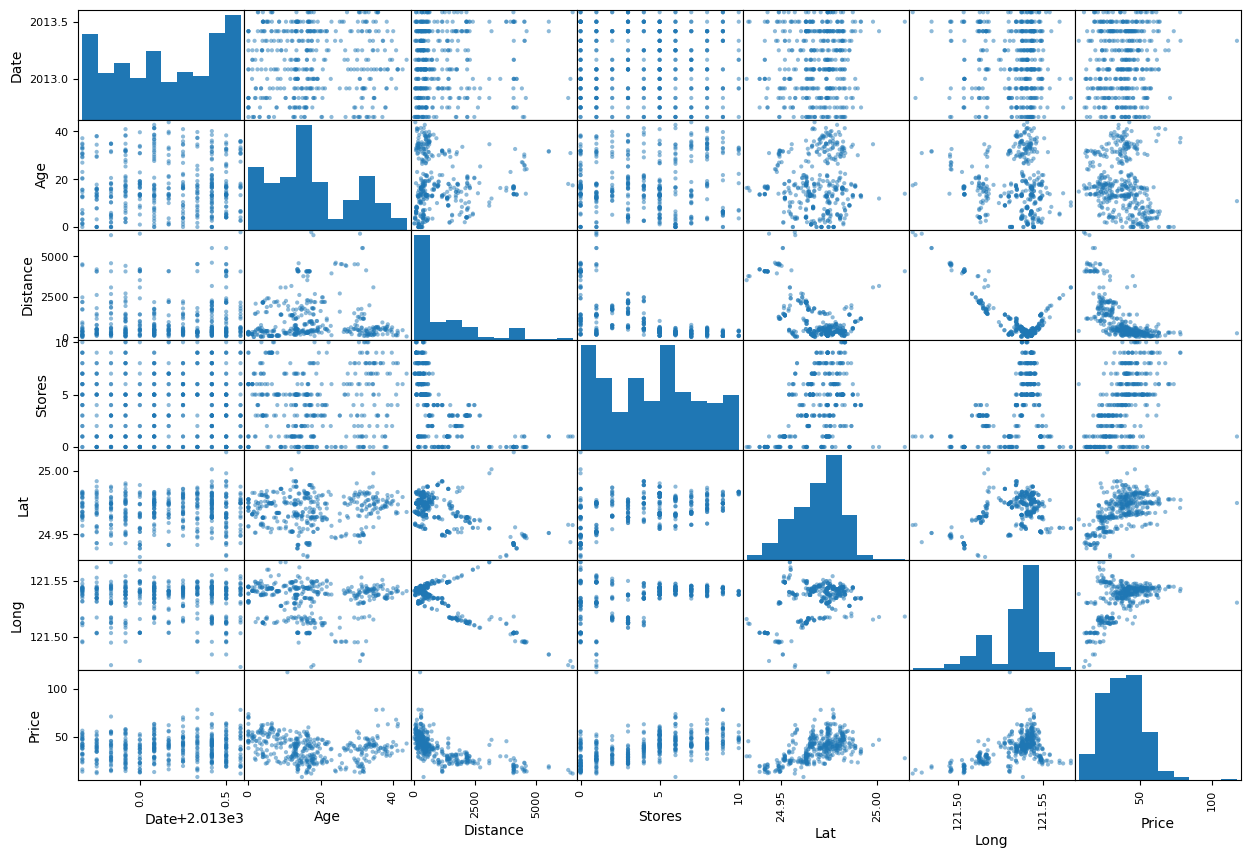

In [53]:
pd.plotting.scatter_matrix(df[interesting_columns], figsize=(15,10));

# 1.3

Looking only at correlations > 0.2 (rounded):

- Age and especially Distance negatively correlate with Price as expected
- Stores, and location (Lat and Long) positively correlate with Price, also as expected
- Distance to metro negatively correlates with stores (makes sense: the further away from a metro station the fewer stores around?)
- Latitude and Longitude correlate with each other and with Stores and Distance, they express neighborhood
- Perhaps unexpectedly, date of sell does not seem to be very relevant for price. Perhaps prices were stable the period covered by the data, or that period is too short to see an effect.

# 1.4

 For normally distributed data, you can use Pearson. But looking at the histograms that is not the case for all feature value distributions. 
- In case of non-normal distribution Spearman's or Kendall should be used (they are "non-parametric"). They both also don't assume a linear relation between the variables (linear = the two variables move together in the same direction at a constant rate), only monotonic relations (when one goes up/down the other goes up/down), which is more appropriate here looking at the scatterplots. 
- Kendall is preferred as it does not require continuous data, it can also be used with ordinal data (as for example in the titanic data we will see today).

# 1.5

- For Age, Date, Stores and Distance, correlation and coefficient relevance show the same systematicity (same direction, same relative influence).
- The big difference is location (latitude, longitude), both correlated positively, but in feature relevance, longitude is slightly negative which is intuitive: the lower the longitude (to the left) the cheaper the houses, the higher the latitude (up) the more expensive. But we really want a feature built on top of the latitude/longitude features that refers to something useful for the task (e.g. neighbourhood or street). 

There will not always be such a strong resemblance of correlations and feature weights (coefficients). 

